Predict the class of generated dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [4]:
y[:5]

array([1, 1, 1, 1, 0])

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
import pandas as pd

df = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
df.shape

(1000, 3)

In [8]:
df['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

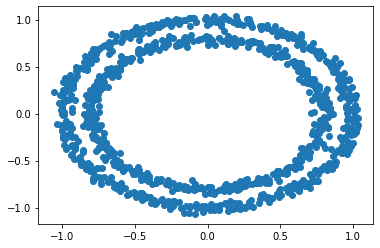

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

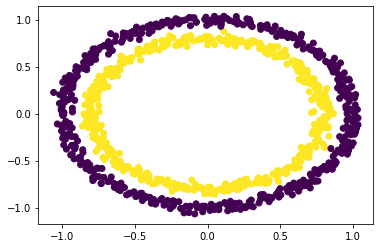

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
training_split = 800

X_train, y_train = X[:training_split], y[:training_split]
X_test, y_test = X[training_split:], y[training_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [12]:
tf.random.set_seed(42)

In [13]:
num_features = 2
num_classes = 1

In [14]:
model = Sequential([
    layers.InputLayer(input_shape=(num_features)),            # 2 features so input_shape is 2
    layers.Dense(10, activation='relu'),            
    layers.Dense(5, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

In [17]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [18]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=4)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=4, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [19]:
batch_size = 128
epochs = 20
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [20]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 0.6877 - accuracy: 0.5213 - val_loss: 0.6788 - val_accuracy: 0.5550
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.6513 - val_loss: 0.6758 - val_accuracy: 0.6700
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.7525 - val_loss: 0.6691 - val_accuracy: 0.6300
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.7475 - val_loss: 0.6594 - val_accuracy: 0.6000
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6450 - accuracy: 0.7050 - val_loss: 0.6450 - val_accuracy: 0.6450
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6305 - accuracy: 0.7337 - val_loss: 0.6263 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6122 - accuracy: 0.8575 - val_loss: 0.6036 - val_accuracy: 0.8800
Epoch 8/20
7/7 [=================

In [21]:
history.history

{'accuracy': [0.5212500095367432,
  0.6512500047683716,
  0.7524999976158142,
  0.7475000023841858,
  0.7049999833106995,
  0.7337499856948853,
  0.8575000166893005,
  0.8799999952316284,
  0.9387500286102295,
  0.8500000238418579,
  0.9574999809265137,
  0.9474999904632568,
  0.9524999856948853,
  0.9624999761581421,
  0.9787499904632568,
  0.9837499856948853,
  0.9787499904632568,
  0.9850000143051147,
  0.9800000190734863,
  0.9925000071525574],
 'loss': [0.6877472400665283,
  0.6770052909851074,
  0.6680188775062561,
  0.657346248626709,
  0.6450334787368774,
  0.6304648518562317,
  0.6122337579727173,
  0.5895869731903076,
  0.5696446299552917,
  0.5445965528488159,
  0.5094199180603027,
  0.4822104573249817,
  0.44690486788749695,
  0.40887269377708435,
  0.3659466505050659,
  0.33254164457321167,
  0.2968546152114868,
  0.2645525634288788,
  0.2426849901676178,
  0.20758439600467682],
 'lr': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
 

<Figure size 432x288 with 0 Axes>

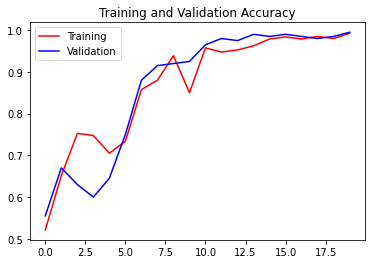

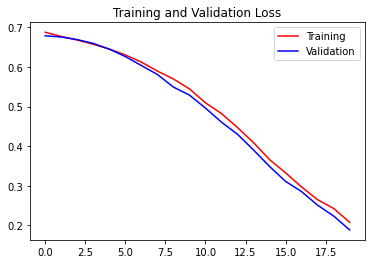

<Figure size 432x288 with 0 Axes>

In [22]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [23]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9950


[0.18846523761749268, 0.9950000047683716]

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
print(y_preds[:8])
y_preds = np.round(y_preds)
print(y_preds[:8])

[[0.80797756]
 [0.924013  ]
 [0.8463776 ]
 [0.90104425]
 [0.28799155]
 [0.06794193]
 [0.86108816]
 [0.05096987]]
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [26]:
confusion_matrix(y_test, y_preds)

array([[101,   0],
       [  1,  98]])